<a href="https://colab.research.google.com/github/MichaelNovandoNapitupulu/Data-Mining/blob/main/Tugas7_DataMining_Dataset_Baru_Michael_Novando_Napitupulu_A11_2022_14452.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from IPython.display import Image
import pydotplus

In [3]:
# Load dataset
file_path = 'Student.csv'
data = pd.read_csv(file_path)

In [4]:
# Encode categorical columns
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
enc = LabelEncoder()
for col in categorical_columns:
    data[col] = enc.fit_transform(data[col])

In [5]:
# Split into features and target variable
X = data.drop(columns='race/ethnicity')  # Features
y = data['race/ethnicity']              # Target

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Train the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [8]:
# Evaluate the model
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.33

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.29      0.04      0.08        45
           2       0.33      0.74      0.46        62
           3       0.30      0.22      0.25        50
           4       0.39      0.24      0.30        29

    accuracy                           0.33       200
   macro avg       0.26      0.25      0.22       200
weighted avg       0.30      0.33      0.27       200


Confusion Matrix:
[[ 0  0 12  2  0]
 [ 0  2 33  7  3]
 [ 0  2 46 11  3]
 [ 0  1 33 11  5]
 [ 0  2 14  6  7]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
# Visualize the decision tree
dot_data = export_graphviz(
    decision_tree,
    out_file=None,
    feature_names=X.columns,
    class_names=[str(cls) for cls in sorted(y.unique())],
    filled=True,
    rounded=True,
    special_characters=True
)

In [10]:
# Convert DOT file to PNG for display in Google Colab
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("decision_tree.png")  # Save as a PNG file

True

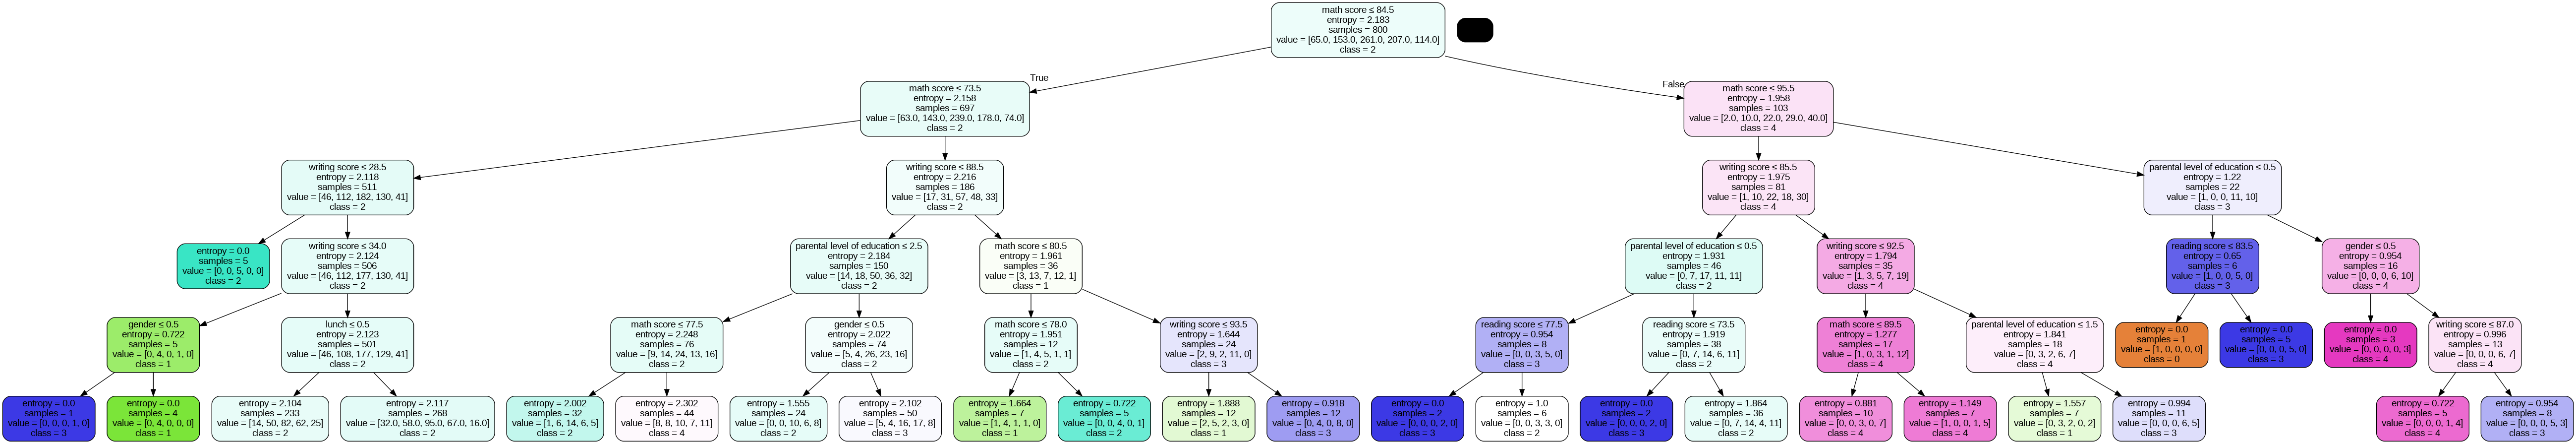

In [11]:
# Display the decision tree image
Image(filename="decision_tree.png")
